# Python Lab Exercise #2

## Objectives:

- Load .csv files into `pandas` DataFrames
- Describe and manipulate data in Series and DataFrames
- Visualize data using DataFrame methods and `matplotlib`

![pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2880px-Pandas_logo.svg.png)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## What is Pandas?

Pandas, as [the Anaconda docs](https://docs.anaconda.com/anaconda/packages/py3.7_osx-64/) tell us, offers us "High-performance, easy-to-use data structures and data analysis tools." It's something like "Excel for Python", but it's quite a bit more powerful.

Let's read in the heart dataset.

Pandas has many methods for reading different types of files. Note that here we have a db file for this exercise.

Read about this dataset [here](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data).

In [43]:
# loading the data from the database python.db
import pandas as pd

con = None
heart_df = pd.DataFrame({
    'id': range(1, 921), 
    'age': (list(range(28, 78)) * 19) [:920], 
    'sex' : ['female', 'male'] * 460,
    'location': (['Cleveland', 'Hungary', 'other'] * 307)[:920],
    'chest_pain_type': (['asymptomatic', 'non-anginal', 'other'] * 307)[:920],
    'resting_blood_pressure': (list(range(0,201)) * 5)[:920],
    'cholesterol': (list(range(0,604)) + list(range(0,604)))[:920],
    'fbs': (['true', 'false', None] * 307)[:920],
    'restecg': (['normal', 'iv_hypertrophy', 'other'] * 307)[:920],
    'thalch': (list(range(60, 203)) * 7 + list(range(60, 135)))[:920]
    
})

print(heart_df.head())
print(len(heart_df))


   id  age     sex   location chest_pain_type  resting_blood_pressure  \
0   1   28  female  Cleveland    asymptomatic                       0   
1   2   29    male    Hungary     non-anginal                       1   
2   3   30  female      other           other                       2   
3   4   31    male  Cleveland    asymptomatic                       3   
4   5   32  female    Hungary     non-anginal                       4   

   cholesterol    fbs         restecg  thalch  
0            0   true          normal      60  
1            1  false  iv_hypertrophy      61  
2            2   None           other      62  
3            3   true          normal      63  
4            4  false  iv_hypertrophy      64  
920


The output of the `.to_sql()` function is a pandas *DataFrame*, which has a familiar tabaular structure of rows and columns.

In [44]:
type(heart_df)

pandas.core.frame.DataFrame

## DataFrames and Series

Two main types of pandas objects are the DataFrame and the Series, the latter being in effect a single column of the former:

In [45]:
age_series = heart_df['age']
type(age_series)

pandas.core.series.Series

Notice how we can isolate a column of our DataFrame simply by using square brackets together with the name of the column.

Both Series and DataFrames have an *index* as well:

In [46]:
heart_df.index

RangeIndex(start=0, stop=920, step=1)

In [47]:
age_series.index

RangeIndex(start=0, stop=920, step=1)

Pandas is built on top of NumPy, and we can always access the NumPy array underlying a DataFrame using `.values`.

In [48]:
heart_df.values

array([[1, 28, 'female', ..., 'true', 'normal', 60],
       [2, 29, 'male', ..., 'false', 'iv_hypertrophy', 61],
       [3, 30, 'female', ..., None, 'other', 62],
       ...,
       [918, 45, 'male', ..., None, 'other', 119],
       [919, 46, 'female', ..., 'true', 'normal', 120],
       [920, 47, 'male', ..., 'false', 'iv_hypertrophy', 121]],
      dtype=object)

## Basic DataFrame Attributes and Methods

### `.head()`

In [49]:
# complete the python code here
heart_df.head(5)

,id,age,sex,location,chest_pain_type,resting_blood_pressure,cholesterol,fbs,restecg,thalch
0,1,28,female,Cleveland,asymptomatic,0,0,true,normal,60
1,2,29,male,Hungary,non-anginal,1,1,false,iv_hypertrophy,61
2,3,30,female,other,other,2,2,None,other,62
3,4,31,male,Cleveland,asymptomatic,3,3,true,normal,63
4,5,32,female,Hungary,non-anginal,4,4,false,iv_hypertrophy,64


### `.tail()`

In [50]:
# complete the python code here
heart_df.tail(8)



,id,age,sex,location,chest_pain_type,resting_blood_pressure,cholesterol,fbs,restecg,thalch
912,913,40,female,Cleveland,asymptomatic,108,308,true,normal,114
913,914,41,male,Hungary,non-anginal,109,309,false,iv_hypertrophy,115
914,915,42,female,other,other,110,310,None,other,116
915,916,43,male,Cleveland,asymptomatic,111,311,true,normal,117
916,917,44,female,Hungary,non-anginal,112,312,false,iv_hypertrophy,118
917,918,45,male,other,other,113,313,None,other,119
918,919,46,female,Cleveland,asymptomatic,114,314,true,normal,120
919,920,47,male,Hungary,non-anginal,115,315,false,iv_hypertrophy,121


### `.info()`

In [52]:
# complete the python code here
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      920 non-null    int64 
 1   age                     920 non-null    int64 
 2   sex                     920 non-null    object
 3   location                920 non-null    object
 4   chest_pain_type         920 non-null    object
 5   resting_blood_pressure  920 non-null    int64 
 6   cholesterol             920 non-null    int64 
 7   fbs                     614 non-null    object
 8   restecg                 920 non-null    object
 9   thalch                  920 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 72.0+ KB


### `.describe()`

In [53]:
# complete the python code here
heart_df.describe()

,id,age,resting_blood_pressure,cholesterol,thalch
count,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,52.173913,94.641304,252.039130,128.270652
std,265.725422,14.472674,57.324949,165.901037,41.421026
min,1.000000,28.000000,0.000000,0.000000,60.000000
25%,230.750000,40.000000,45.750000,114.750000,92.000000
50%,460.500000,52.000000,91.500000,229.500000,126.000000
75%,690.250000,65.000000,143.000000,373.250000,164.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000


### `.dtypes`

In [54]:
# complete the python code here
heart_df.dtypes

id                         int64
age                        int64
sex                       object
location                  object
chest_pain_type           object
resting_blood_pressure     int64
cholesterol                int64
fbs                       object
restecg                   object
thalch                     int64
dtype: object

### `.shape`

In [55]:
# complete the python code here
heart_df.shape

(920, 10)

### Exploratory Plots

Let's make ourselves a histogram of ages:

/var/folders/nj/gkw4_xxx20l13pyzd4r4z6w40000gp/T/ipykernel_66136/574283143.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=heart_df['age']);
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


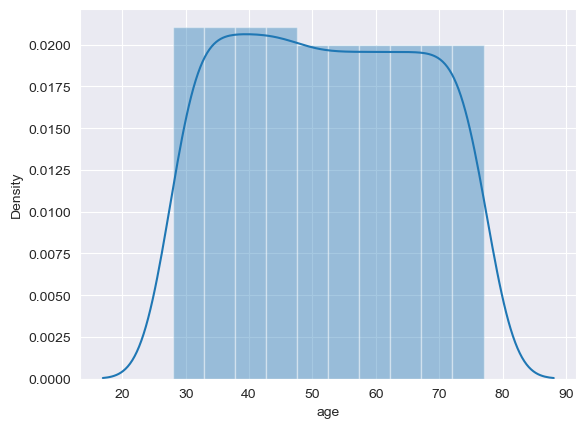

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.distplot(a=heart_df['age']);



# For more recent versions of seaborn:
# sns.histplot(data=heart_df['age'], kde=True);

And while we're at it let's do a scatter plot of maximum heart rate vs. age:

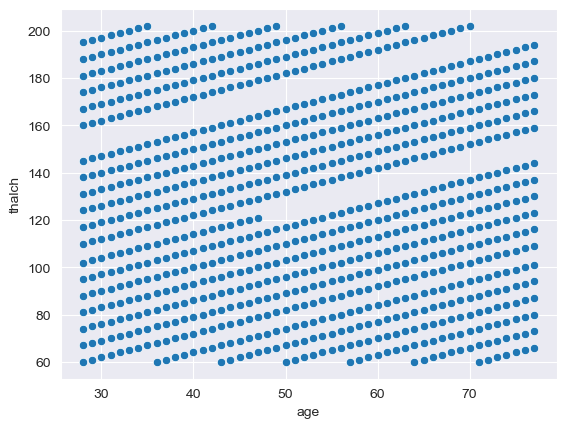

In [68]:
sns.scatterplot(x=heart_df['age'], y=heart_df['thalch']);

## Adding to a DataFrame

### Adding Rows

Here are two rows that our engineer accidentally left out of the .csv file, expressed as a Python dictionary:

In [69]:
extra_rows = {'age': [40, 30], 
              'sex': [1, 0], 
              'cp': [0, 0], 
              'trestbps': [120, 130],
              'chol': [240, 200],
              'fbs': [0, 0], 
              'restecg': [1, 0], 
              'thalach': [120, 122], 
              'exang': [0, 1],
              'oldpeak': [0.1, 1.0], 
              'slope': [1, 1], 
              'ca': [0, 1], 
              'thal': [2, 3],
              'target': [0, 0]}
extra_rows

{'age': [40, 30],
 'sex': [1, 0],
 'cp': [0, 0],
 'trestbps': [120, 130],
 'chol': [240, 200],
 'fbs': [0, 0],
 'restecg': [1, 0],
 'thalach': [120, 122],
 'exang': [0, 1],
 'oldpeak': [0.1, 1.0],
 'slope': [1, 1],
 'ca': [0, 1],
 'thal': [2, 3],
 'target': [0, 0]}

How can we add this to the bottom of our dataset?

In [70]:
# Let's first turn this into a DataFrame.
# We can use the .from_dict() method.

missing = pd.DataFrame(extra_rows)
missing

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,0,120,240,0,1,120,0,0.1,1,0,2,0
1,30,0,0,130,200,0,0,122,1,1.0,1,1,3,0


In [78]:
# Now we just need to concatenate the two DataFrames together.
# Note the `ignore_index` parameter! We'll set that to True.
# complete the python code here

heart_df = pd.concat([heart_df, missing], ignore_index=True)


In [81]:
# Let's check the end to make sure we were successful!
# complete the python code here

print(heart_df.tail())
print(len(heart_df))

     id  age sex location chest_pain_type  resting_blood_pressure  \
925 NaN   30   0      NaN             NaN                     NaN   
926 NaN   40   1      NaN             NaN                     NaN   
927 NaN   30   0      NaN             NaN                     NaN   
928 NaN   40   1      NaN             NaN                     NaN   
929 NaN   30   0      NaN             NaN                     NaN   

     cholesterol fbs restecg  thalch   cp  trestbps   chol  thalach  exang  \
925          NaN   0       0     NaN  0.0     130.0  200.0    122.0    1.0   
926          NaN   0       1     NaN  0.0     120.0  240.0    120.0    0.0   
927          NaN   0       0     NaN  0.0     130.0  200.0    122.0    1.0   
928          NaN   0       1     NaN  0.0     120.0  240.0    120.0    0.0   
929          NaN   0       0     NaN  0.0     130.0  200.0    122.0    1.0   

     oldpeak  slope   ca  thal  target  
925      1.0    1.0  1.0   3.0     0.0  
926      0.1    1.0  0.0   2.0    

### Adding Columns

Adding a column is very easy in `pandas`. Let's add a new column to our dataset called "test", and set all of its values to 0.

In [92]:
heart_df['test'] = 0


In [103]:
heart_augmented = heart_df.copy()
heart_augmented.head()

,id,age,sex,location,chest_pain_type,resting_blood_pressure,cholesterol,fbs,restecg,thalch,...,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target,test
0,1.0,28,female,Cleveland,asymptomatic,0.0,0.0,true,normal,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2.0,29,male,Hungary,non-anginal,1.0,1.0,false,iv_hypertrophy,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3.0,30,female,other,other,2.0,2.0,None,other,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,4.0,31,male,Cleveland,asymptomatic,3.0,3.0,true,normal,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5.0,32,female,Hungary,non-anginal,4.0,4.0,false,iv_hypertrophy,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


I can also add columns whose values are functions of existing columns.

Suppose I want to add the cholesterol column ("chol") to the resting systolic blood pressure column ("trestbps"):

In [106]:
# complete the python code here

heart_augmented['chol_plus_trestbps'] = heart_augmented['chol'] + heart_augmented['trestbps']


In [ ]:
heart_augmented.head()

## Filtering

We can use filtering techniques to see only certain rows of our data. If we wanted to see only the rows for patients 70 years of age or older, we can simply type:

In [107]:
heart_augmented['age'] >= 70

0      False
1      False
2      False
3      False
4      False
       ...  
925    False
926    False
927    False
928    False
929    False
Name: age, Length: 930, dtype: bool

In [108]:
heart_augmented[heart_augmented['age'] >= 70]

,id,age,sex,location,chest_pain_type,resting_blood_pressure,cholesterol,fbs,restecg,thalch,...,chol,thalach,exang,oldpeak,slope,ca,thal,target,test,chol_plus_trestbps
42,43.0,70,female,Cleveland,asymptomatic,42.0,42.0,true,normal,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
43,44.0,71,male,Hungary,non-anginal,43.0,43.0,false,iv_hypertrophy,103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
44,45.0,72,female,other,other,44.0,44.0,None,other,104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
45,46.0,73,male,Cleveland,asymptomatic,45.0,45.0,true,normal,105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
46,47.0,74,female,Hungary,non-anginal,46.0,46.0,false,iv_hypertrophy,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,896.0,73,male,Hungary,non-anginal,91.0,291.0,false,iv_hypertrophy,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
896,897.0,74,female,other,other,92.0,292.0,None,other,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
897,898.0,75,male,Cleveland,asymptomatic,93.0,293.0,true,normal,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
898,899.0,76,female,Hungary,non-anginal,94.0,294.0,false,iv_hypertrophy,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


Use '&' for "and" and '|' for "or".

### Exercise

Display the patients who are 70 or over as well as the patients whose trestbps score is greater than 170.

In [110]:
# complete the python code here

heart_augmented[(heart_augmented['age'] >= 70) | (heart_augmented['trestbps'] >170)]

,id,age,sex,location,chest_pain_type,resting_blood_pressure,cholesterol,fbs,restecg,thalch,...,chol,thalach,exang,oldpeak,slope,ca,thal,target,test,chol_plus_trestbps
42,43.0,70,female,Cleveland,asymptomatic,42.0,42.0,true,normal,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
43,44.0,71,male,Hungary,non-anginal,43.0,43.0,false,iv_hypertrophy,103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
44,45.0,72,female,other,other,44.0,44.0,None,other,104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
45,46.0,73,male,Cleveland,asymptomatic,45.0,45.0,true,normal,105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
46,47.0,74,female,Hungary,non-anginal,46.0,46.0,false,iv_hypertrophy,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,896.0,73,male,Hungary,non-anginal,91.0,291.0,false,iv_hypertrophy,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
896,897.0,74,female,other,other,92.0,292.0,None,other,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
897,898.0,75,male,Cleveland,asymptomatic,93.0,293.0,true,normal,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
898,899.0,76,female,Hungary,non-anginal,94.0,294.0,false,iv_hypertrophy,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


### Exploratory Plot

Using the subframe we just made, let's make a scatter plot of their cholesterol levels vs. age and color by sex:

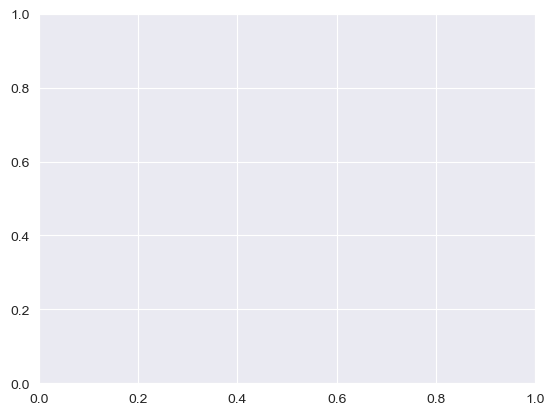

In [112]:
# complete the python code here
at_risk = heart_augmented[(heart_augmented['age'] >= 60) | (heart_augmented['chol'] > 240)]

sns.scatterplot(data=at_risk, x='age', y='chol', hue='sex');

### `.loc` and `.iloc`

We can use `.loc` to get, say, the first ten values of the age and resting blood pressure ("trestbps") columns:

In [116]:
heart_augmented.loc[:, ['age', 'trestbps']].head(10)


,age,trestbps
0,28,NaN
1,29,NaN
2,30,NaN
3,31,NaN
4,32,NaN
5,33,NaN
6,34,NaN
7,35,NaN
8,36,NaN
9,37,NaN


In [117]:
heart_augmented.loc[:9, ['age', 'trestbps']]

,age,trestbps
0,28,NaN
1,29,NaN
2,30,NaN
3,31,NaN
4,32,NaN
5,33,NaN
6,34,NaN
7,35,NaN
8,36,NaN
9,37,NaN


`.iloc` is used for selecting locations in the DataFrame **by number**:

In [118]:
heart_augmented.iloc

In [119]:
heart_augmented.iloc[3, 0]

4.0

In [120]:
heart_augmented.head()

,id,age,sex,location,chest_pain_type,resting_blood_pressure,cholesterol,fbs,restecg,thalch,...,chol,thalach,exang,oldpeak,slope,ca,thal,target,test,chol_plus_trestbps
0,1.0,28,female,Cleveland,asymptomatic,0.0,0.0,true,normal,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2.0,29,male,Hungary,non-anginal,1.0,1.0,false,iv_hypertrophy,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3.0,30,female,other,other,2.0,2.0,None,other,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4.0,31,male,Cleveland,asymptomatic,3.0,3.0,true,normal,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,5.0,32,female,Hungary,non-anginal,4.0,4.0,false,iv_hypertrophy,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


### Exercise

How would we get the same slice as just above by using .iloc() instead of .loc()?

In [126]:
# complete the python code here
heart_augmented.iloc[0:5, 0:22]


,id,age,sex,location,chest_pain_type,resting_blood_pressure,cholesterol,fbs,restecg,thalch,...,chol,thalach,exang,oldpeak,slope,ca,thal,target,test,chol_plus_trestbps
0,1.0,28,female,Cleveland,asymptomatic,0.0,0.0,true,normal,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2.0,29,male,Hungary,non-anginal,1.0,1.0,false,iv_hypertrophy,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3.0,30,female,other,other,2.0,2.0,None,other,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4.0,31,male,Cleveland,asymptomatic,3.0,3.0,true,normal,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,5.0,32,female,Hungary,non-anginal,4.0,4.0,false,iv_hypertrophy,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


## Statistics

### `.mean()`

In [128]:
# complete the python code here

heart_augmented.mean(numeric_only=True)

id                        460.500000
age                        51.989247
resting_blood_pressure     94.641304
cholesterol               252.039130
thalch                    128.270652
cp                          0.000000
trestbps                  125.000000
chol                      220.000000
thalach                   121.000000
exang                       0.500000
oldpeak                     0.550000
slope                       1.000000
ca                          0.500000
thal                        2.500000
target                      0.000000
test                        0.000000
chol_plus_trestbps        345.000000
dtype: float64

Be careful! Some of these will are not straightforwardly interpretable. What does an average "sex" of 0.682 mean?

### `.min()`

In [130]:
# complete the python code here
heart_augmented.min(numeric_only=True)


id                          1.0
age                        28.0
resting_blood_pressure      0.0
cholesterol                 0.0
thalch                     60.0
cp                          0.0
trestbps                  120.0
chol                      200.0
thalach                   120.0
exang                       0.0
oldpeak                     0.1
slope                       1.0
ca                          0.0
thal                        2.0
target                      0.0
test                        0.0
chol_plus_trestbps        330.0
dtype: float64

### `.max()`

In [131]:
# complete the python code here
heart_augmented.max(numeric_only=True)


id                        920.0
age                        77.0
resting_blood_pressure    200.0
cholesterol               603.0
thalch                    202.0
cp                          0.0
trestbps                  130.0
chol                      240.0
thalach                   122.0
exang                       1.0
oldpeak                     1.0
slope                       1.0
ca                          1.0
thal                        3.0
target                      0.0
test                        0.0
chol_plus_trestbps        360.0
dtype: float64

## Series Methods

### `.value_counts()`

How many different values does slope have? What about sex? And target?

In [132]:
heart_augmented['slope'].value_counts()

slope
1.0    10
Name: count, dtype: int64

In [133]:
heart_augmented['sex'].value_counts()

sex
female    460
male      460
1           5
0           5
Name: count, dtype: int64

### `.sort_values()`

In [134]:
heart_augmented['age'].sort_values()

0      28
150    28
200    28
50     28
250    28
       ..
849    77
649    77
99     77
799    77
899    77
Name: age, Length: 930, dtype: int64

## `pandas`-Native Plotting

The `.plot()` and `.hist()` methods available for DataFrames use a wrapper around `matplotlib`:

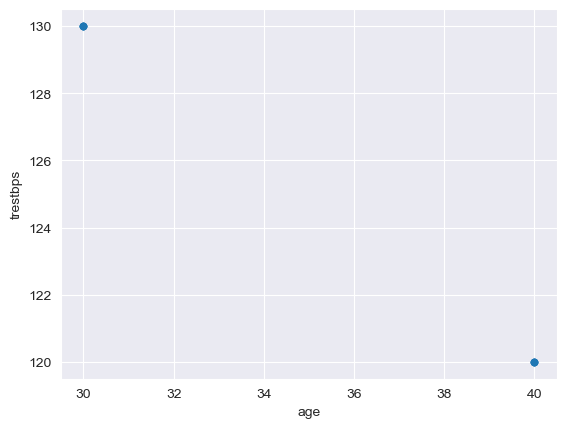

In [135]:
heart_augmented.plot(x='age', y='trestbps', kind='scatter');

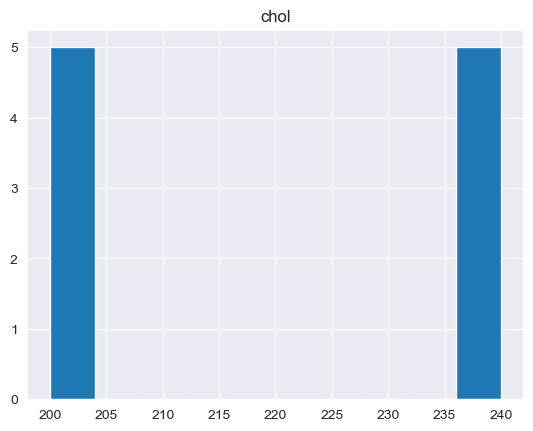

In [136]:
heart_augmented.hist(column='chol');

### Exercises

1. Make a bar plot of "age" vs. "slope" for the `heart_augmented` DataFrame.

<Axes: xlabel='age'>

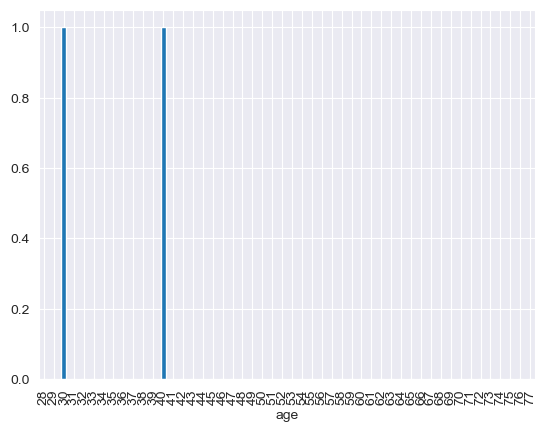

In [149]:
# complete the python code here
heart_augmented.groupby('age')['slope'].mean().plot(kind='bar')


2. Make a histogram of ages for **just the men** in `heart_augmented` (heart_augmented['sex']=1).

<Axes: >

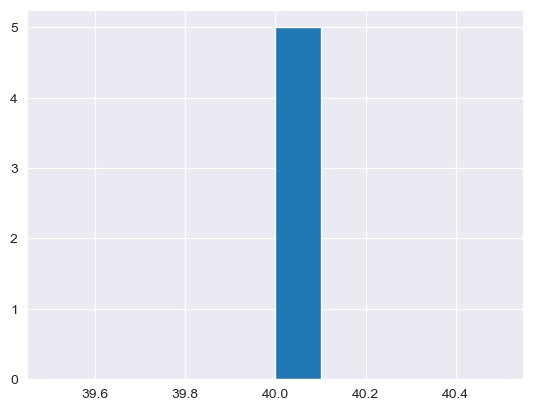

In [152]:
# complete the python code here
heart_augmented[heart_augmented['sex'] == 1]['age'].hist()


3. Make separate scatter plots of cholesterol vs. resting systolic blood pressure for the target=0 and the target=1 groups. Put both plots on the same figure and give each an appropriate title.

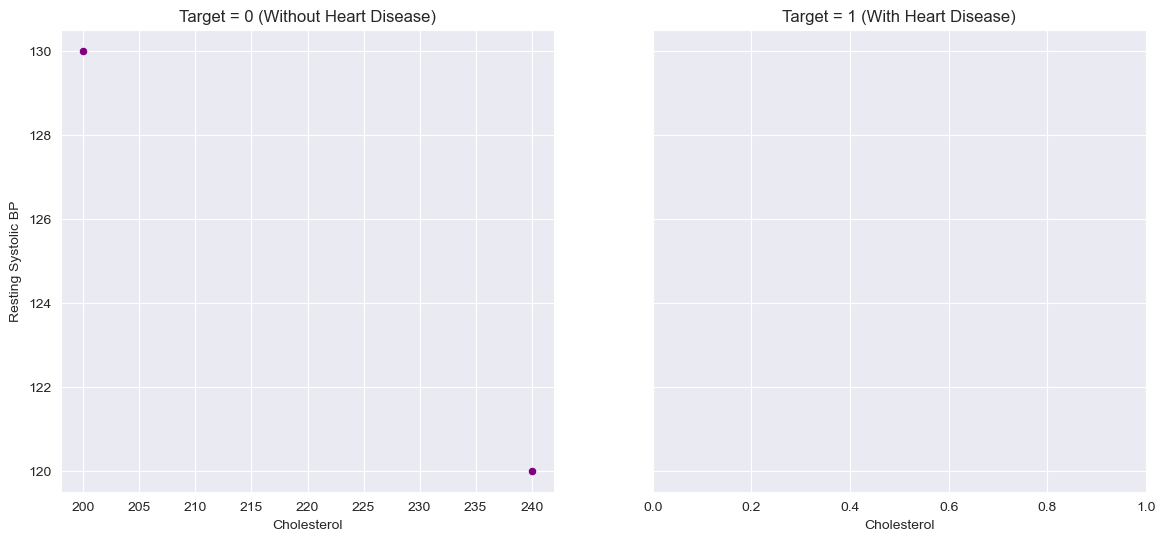

In [160]:
# complete the python code here
group_0= heart_augmented[heart_augmented['target'] ==0]
group_1= heart_augmented[heart_augmented['target'] ==1]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.scatterplot(data=group_0, x='chol', y='trestbps' , ax=axes[0], color='purple')
axes[0].set_title('Target = 0 (Without Heart Disease)')
axes[0].set_xlabel('Cholesterol')
axes[0].set_ylabel('Resting Systolic BP')

sns.scatterplot(data=group_1, x='chol', y='trestbps', ax=axes[1], color='red')
axes[1].set_title('Target = 1 (With Heart Disease)')
axes[1].set_xlabel('Cholesterol')
axes[1].set_ylabel('')

plt.tight_layout
plt.show()

